<a href="https://colab.research.google.com/github/kagst27/SeattlePublicLibraryData/blob/main/Library_Inventory_Data_Analysis_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import numpy as np
import pandas as pd
import string

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')



Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Google_Colab /Colab Notebooks/Library Collection Inventory Dataset


/content/drive/MyDrive/Google_Colab /Colab Notebooks/Library Collection Inventory Dataset


In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/MyDrive/Google_Colab /Colab Notebooks/Library Collection Inventory Dataset': ['Library_Collection_Inventory.csv', 'Library Inventory Data Analysis SI.ipynb']


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


### *What is the dataset, Library Collection Inventory?*
##### This dataset includes monthly snapshot of all of the physical items in the Seattle Public Library’s collection. Consistent monthly data begins with a snapshot taken August 1, 2016, continuing to the present. Additionally, this dataset contains snapshots taken on: January 1 in the years 2012, 2013, 2014, and 2016.

### *Dataset Columns*

###### Subjects : Subject authroity records associated with the title, including Motion Pictures, Computer Programming, etc... Typiclaly these are highly specific

   ###### Item type : a code from the catalog record that describes the type of item. There are a total of 21 item types. Most commonly reported item types include: 
   ###### **acbk (adult book), accd (adult CD), jcbk (children's book)**
 

###### PublicationYear : The PublicationYear field includes the year from the catalog record in which the item was published, printed, or copyrighted as recorded in the Horizon bibliographic record.

###### This column is formatted as follows: 
   ###### 2005—publication date
   ###### c. 2005 – copyright symbol
   ###### [2005] – Printing date
   ###### p. 2005 – phonogram copyright symbol
   ###### 2004, c. 2005 – publication and copyright date
   ###### 2005-2007 – intervening years 
   ###### [2005?] – Approximate date

###### Reprot Date : The date when this item count was collected from the ILS (Horizon).

###### ItemCount : The number of items in this location, collection, item type, and item status as of the report date.


In [ ]:
import timeit
start_time = timeit.default_timer()
# code you want to evaluate


In [ ]:
nRowsRead = 5000000 # specify 'None' if want to read whole file nrows = nRowsRead, 
data = pd.read_csv("Library_Collection_Inventory.csv", usecols = ['Title','ReportDate', 'ItemCount', 'PublicationYear', 'Publisher', 'ItemType','Author'], nrows = nRowsRead, keep_default_na = True)
data.dataframeName= 'library-collecion-inventory'
nRow, nCol = data.shape
data.tail(5)


,Title,Author,PublicationYear,Publisher,ItemType,ReportDate,ItemCount
4999995,Interaction of color / Josef Albers.,"Albers, Josef",c2013.,"Yale University Press,",acbk,03/01/2020,1
4999996,Public Buildings Bills -- 1961 : hearings befo...,United States. Congress. House. Committee on P...,1961.,"U.S. G.P.O.,",armfc,03/01/2020,1
4999997,Child Sex Crimes Wiretapping Act of 1999 : rep...,United States. Congress. House. Committee on t...,NaN,NaN,armfc,03/01/2020,1
4999998,Redesigning the future: a systems approach to ...,"Ackoff, Russell Lincoln, 1919-2009",[1974],"Wiley,",acbk,03/01/2020,1
4999999,The long bitter trail : Andrew Jackson and the...,"Wallace, Anthony F. C., 1923-",1993.,"Hill and Wang,",acbk,03/01/2020,1


### Identifying Missing Data, and Tidying Up Data:

##### Here is the missing data for each of the columns we are concerned about. 'Author' values missing being the most 15.75 % of the total data. Followed by publication year & Publisher. In this case it would not make sense to fill in missing data as the missing values are specific to the item types, and so on... 

In [ ]:
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values = missing_values.reset_index()
missing_values.columns = ['Column', 'NA values']

missing_values

,Column,NA values
0,Title,0.004655
1,Publisher,0.008704
2,PublicationYear,0.015583
3,Author,0.153781


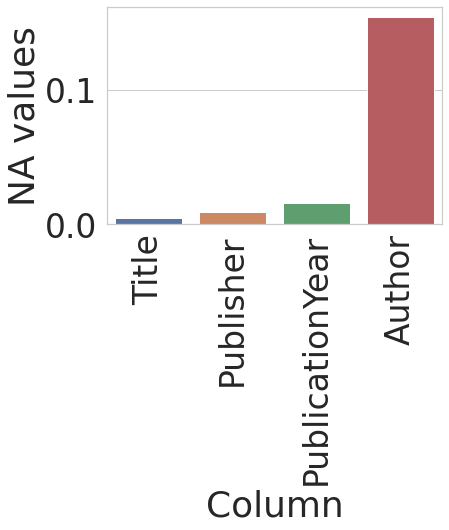

In [ ]:
sns.set(style="whitegrid", color_codes=True,font_scale=3 )
sns.barplot(x = 'Column', y = 'NA values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

#### Categorize Items - Identify Trends

In [ ]:
ItemCategories = data['ItemType'].value_counts(ascending=True)
ItemCategories = pd.DataFrame(ItemCategories[-30:]).reset_index()
ItemCategories.columns = ["ItemType", "ItemCount"]
ItemCategories

,ItemType,ItemCount
0,ardvd,232
1,acpost,247
2,arnp,310
3,jckit,325
4,arvhs,1294
5,ucfold,1314
6,armfm,1572
7,arcd,1684
8,armus,1865
9,bccd,1896


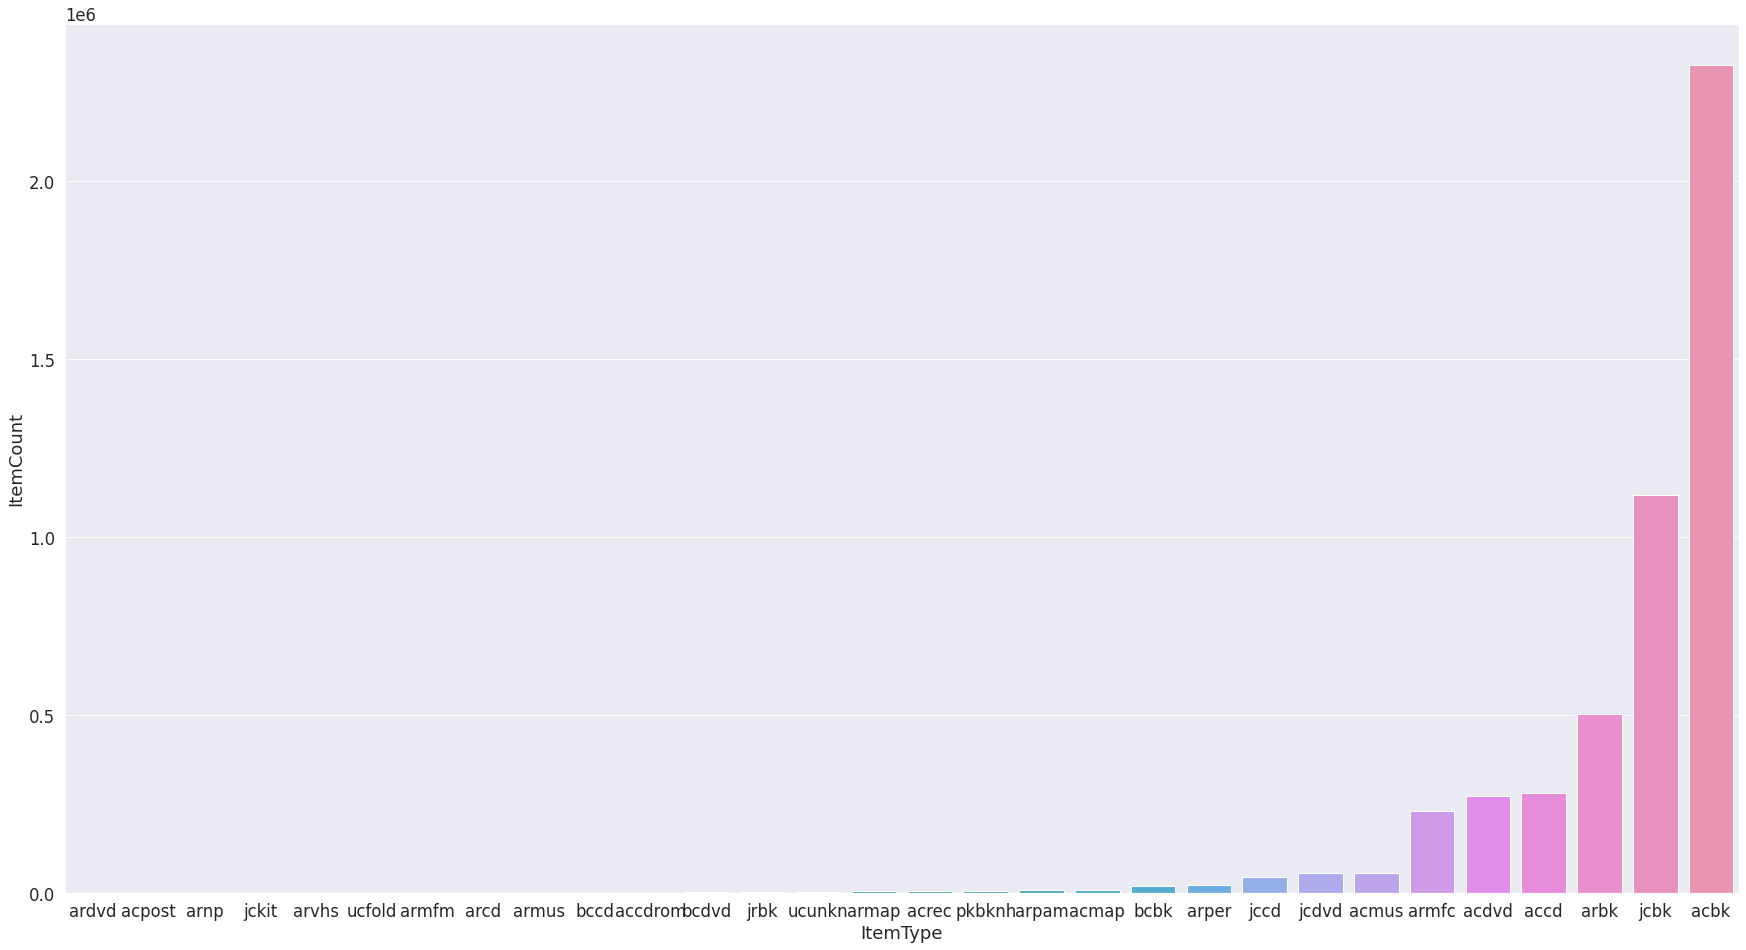

In [ ]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategories)

In [ ]:
ItemCategoriesBig = data['ItemType'].value_counts(ascending=True)
ItemCategoriesBig = pd.DataFrame(ItemCategoriesBig[-9:]).reset_index()
ItemCategoriesBig.columns = ["ItemType", "ItemCount"]
ItemCategoriesBig

,ItemType,ItemCount
0,jccd,46085
1,jcdvd,57686
2,acmus,58030
3,armfc,231422
4,acdvd,272771
5,accd,282351
6,arbk,503057
7,jcbk,1117028
8,acbk,2325678


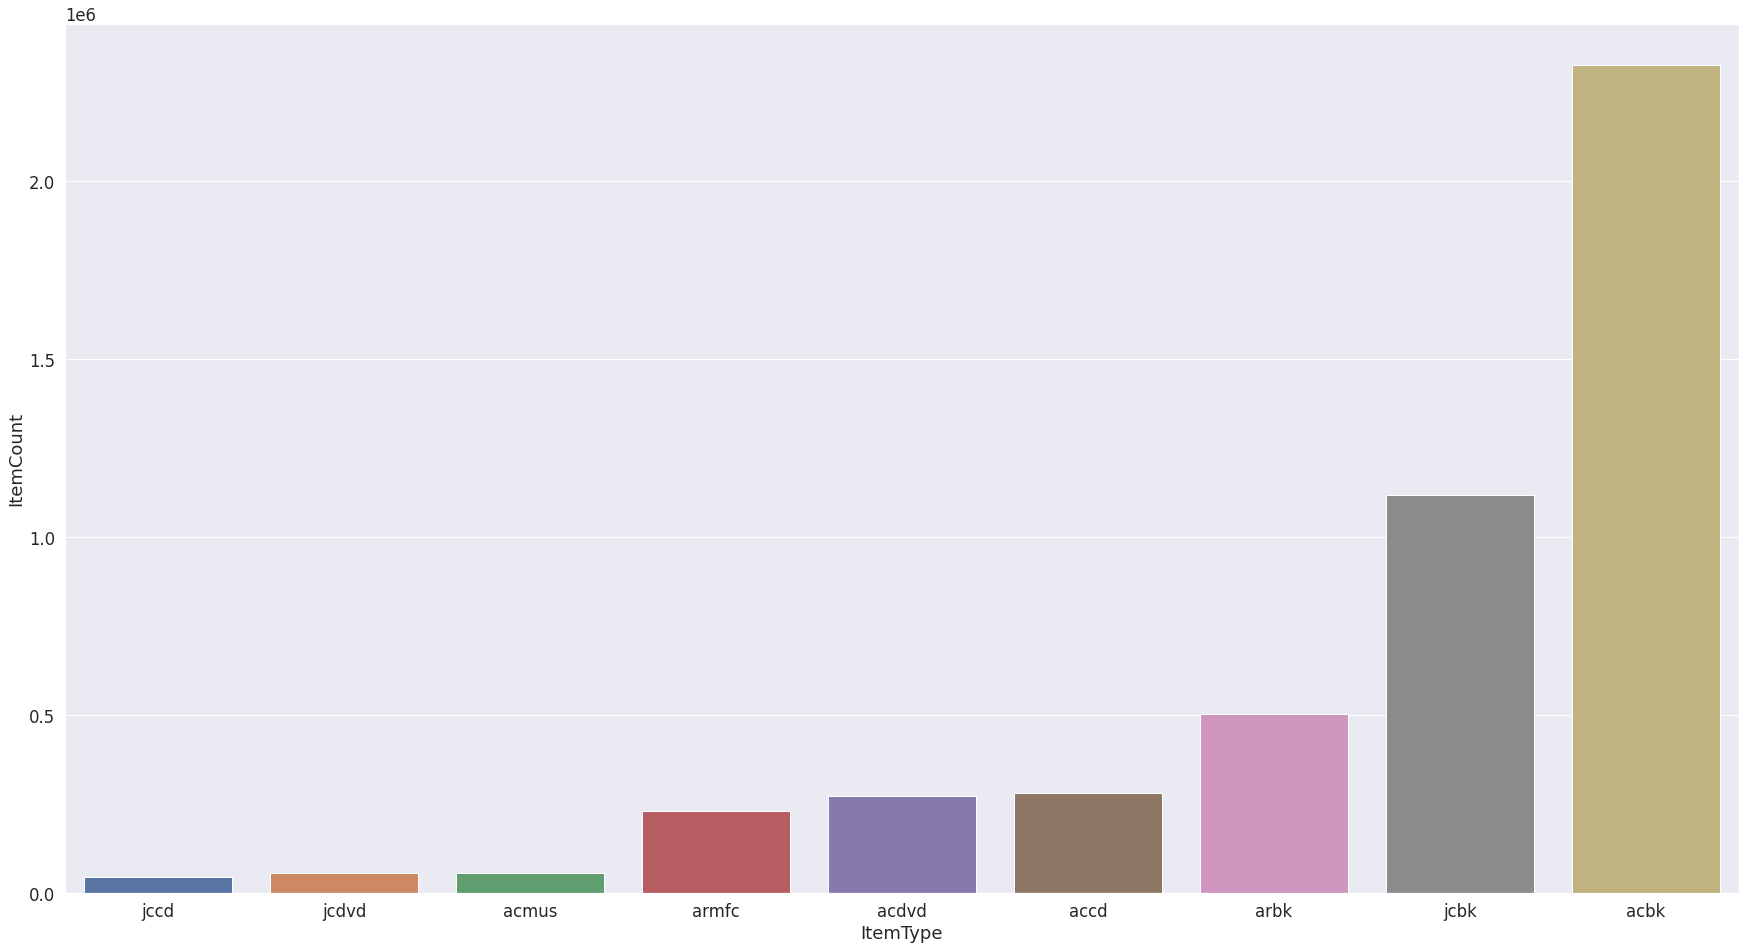

In [ ]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategoriesBig)

In [ ]:
publishers = data['Publisher'].value_counts(ascending=True)

In [ ]:
top_10_publishers = pd.DataFrame(publishers[-10:]).reset_index()
top_10_publishers.columns = ["Publisher", "Publications"]
top_10_publishers

,Publisher,Publications
0,"U.S. G.P.O. : For sale by the U.S. G.P.O., Sup...",28608
1,"Little, Brown and Company,",32850
2,"U.S. G.P.O. : For sale by the Supt. of Docs., ...",33957
3,"Alfred A. Knopf,",34428
4,"Candlewick Press,",34779
5,"Houghton Mifflin Harcourt,",35155
6,"[U.S. G.P.O.],",44281
7,"[publisher not identified],",48536
8,"Random House,",58083
9,"U.S. G.P.O.,",104588


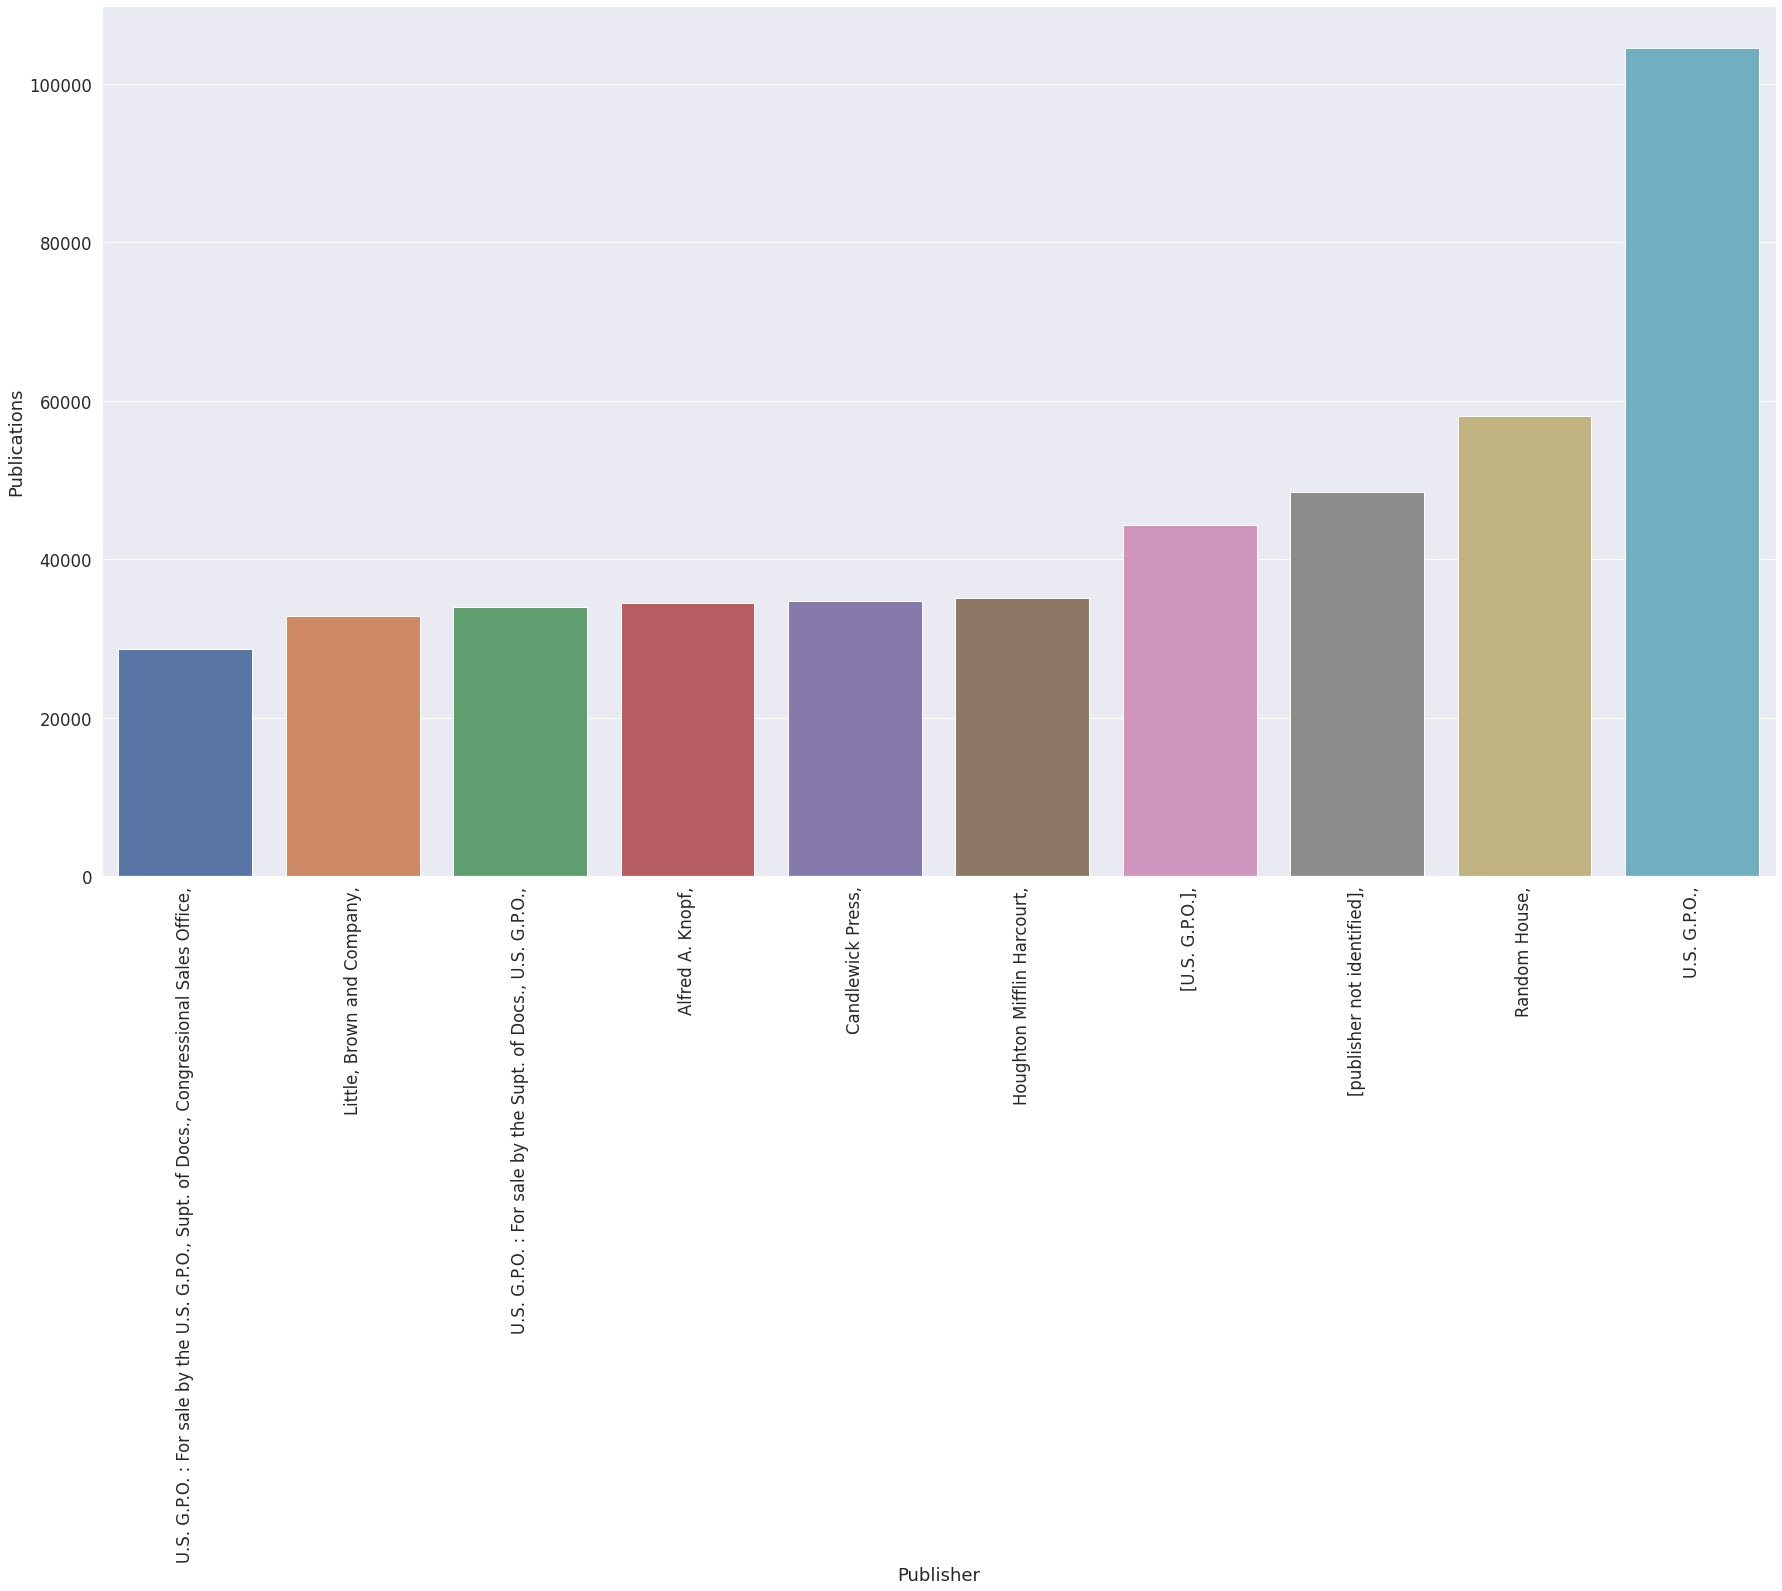

In [ ]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='Publisher',y='Publications', data=top_10_publishers)
plt.xticks(rotation = 90)
plt.show()

How is amount of publications distributed between publishers? Is this distribution normal?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


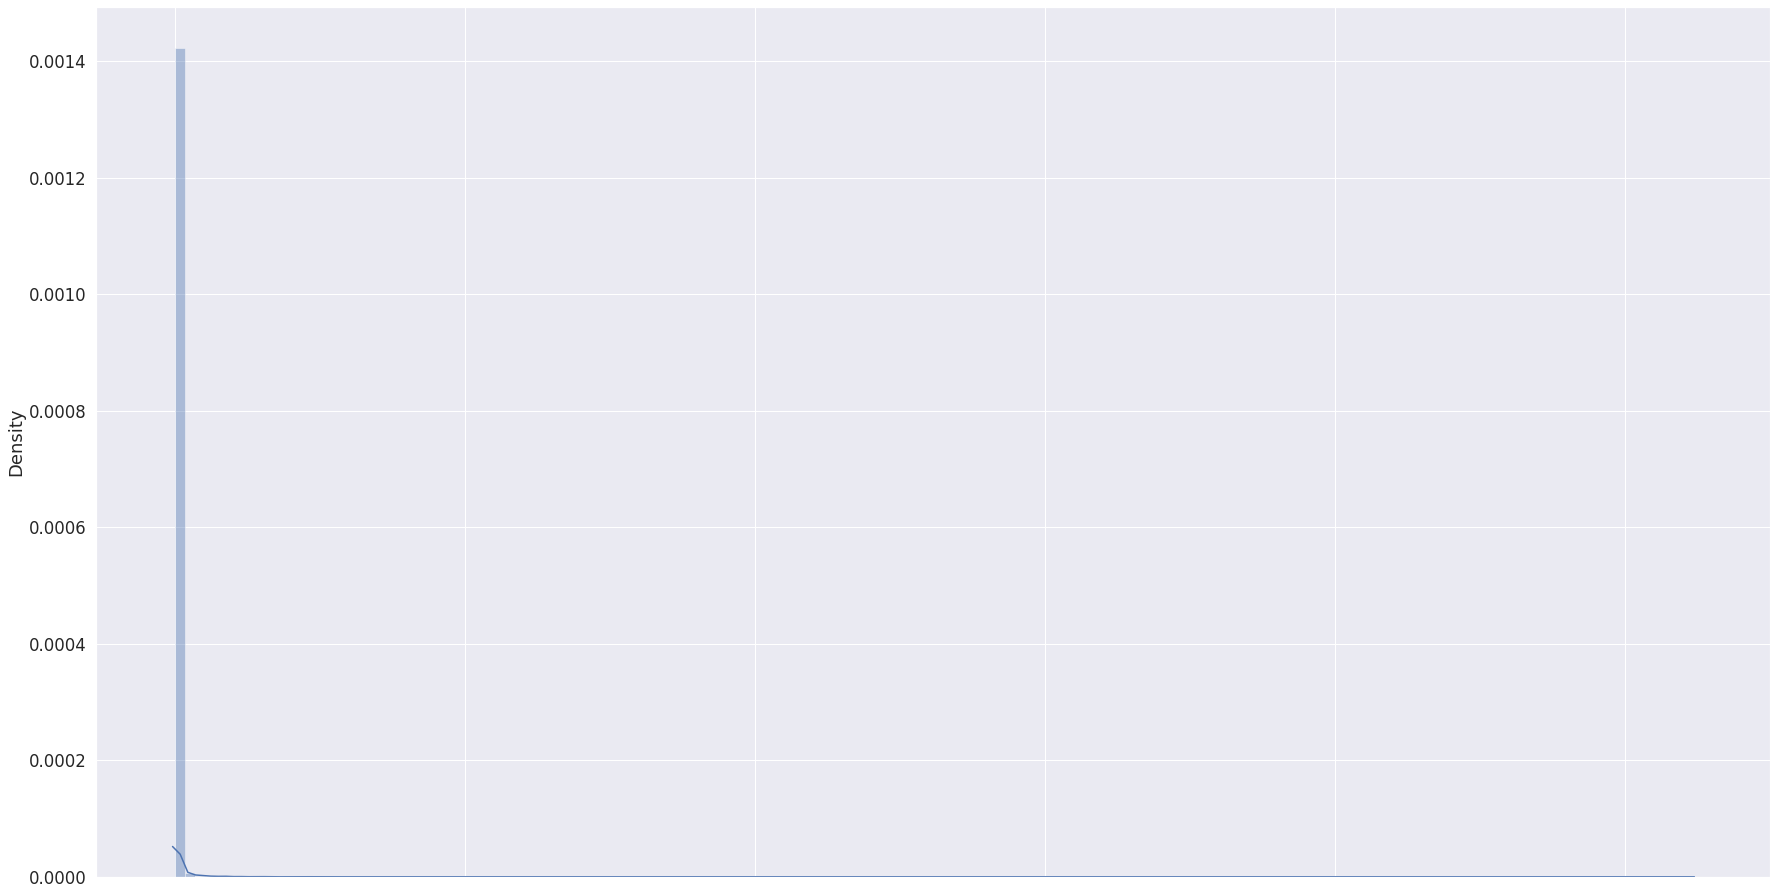

In [ ]:
publishers_arranged = pd.DataFrame(publishers).reset_index()
publishers_arranged.columns = ["Publisher", "Publications"]
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.distplot(publishers_arranged, x=publishers_arranged["Publications"], bins = 150)
p.set(xticklabels=[])
p

##### There are a lot of publishers with few titles. Those who had 10 titles or less were removed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


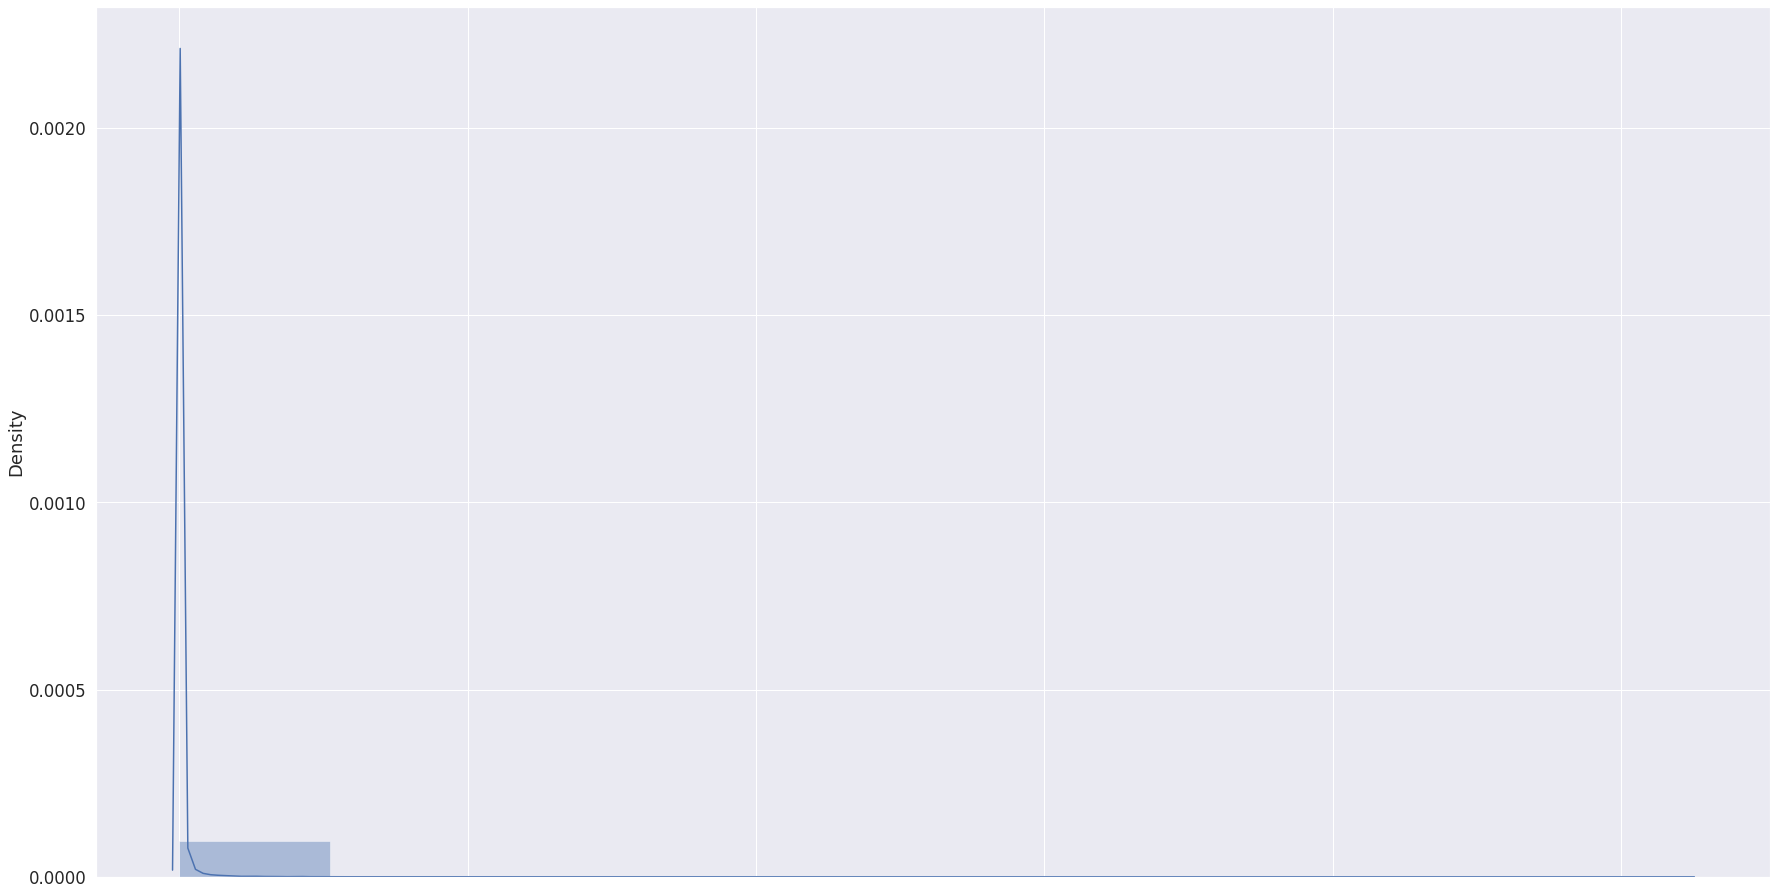

In [ ]:
publishers_arranged = pd.DataFrame(publishers).reset_index()
publishers_arranged.columns = ["Publisher", "Publications"]
publishers_active = publishers_arranged[publishers_arranged["Publications"] > 10]
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.distplot(publishers_arranged, x=publishers_active["Publications"], bins = 10)
p.set(xticklabels=[])
p

#### Trend for publishing industry was developing through years.

In [ ]:
publications_by_year = data['PublicationYear'].value_counts()
publications_by_year = pd.DataFrame(publications_by_year).reset_index()
publications_by_year.columns = ["Year", "Publications"]
publications_by_year.head()

,Year,Publications
0,[2018],282246
1,[2019],262948
2,[2017],232512
3,2019.,208406
4,2018.,205195


Will need to perform some data clearing

In [ ]:
data['PublicationYearNumeric'] = data['PublicationYear'].str.replace("[^0-9]",'') # removing everything that is non-numeric
data['PublicationYearNumeric'] = pd.to_numeric(data['PublicationYear'], errors='coerce') # convert data to numeric values

In [ ]:
publications_by_year = data['PublicationYearNumeric'].value_counts()
publications_by_year = pd.DataFrame(publications_by_year).reset_index()
publications_by_year.columns = ["Year", "Publications"]
publications_by_year.head()

,Year,Publications
0,2019.0,211536
1,2018.0,208064
2,2017.0,185372
3,2016.0,153373
4,2015.0,115685


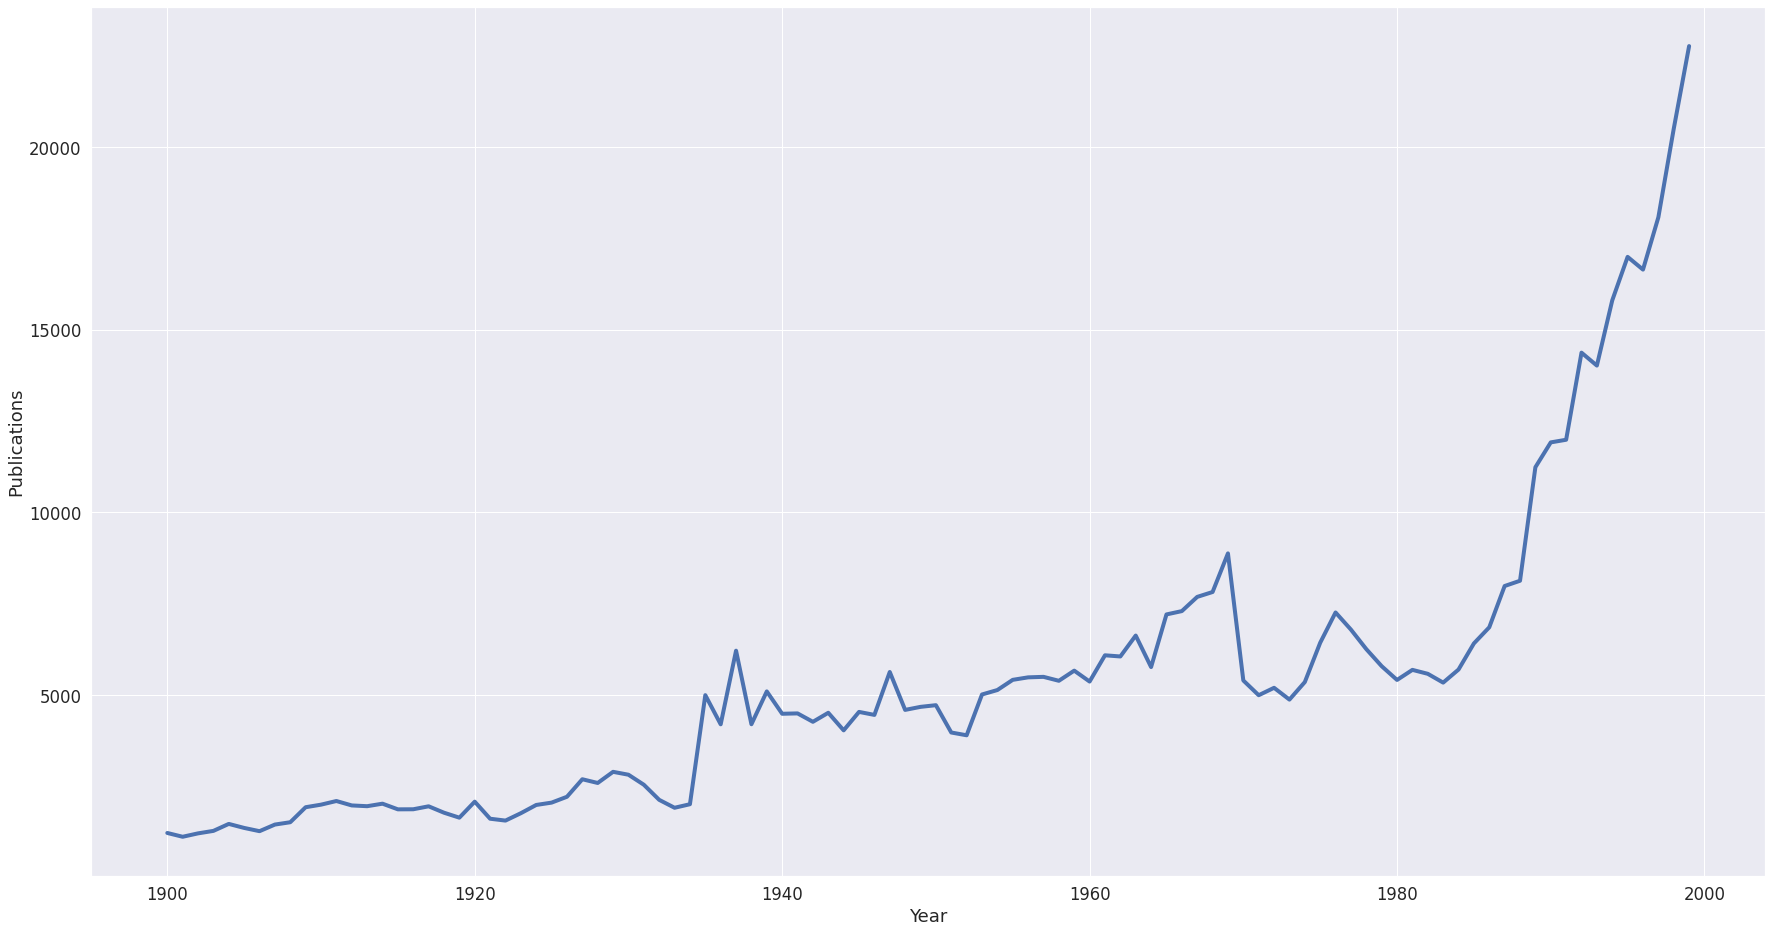

In [ ]:
publications_by_year_1990_2000 = publications_by_year[(publications_by_year["Year"] >= 1900) & (publications_by_year["Year"] < 2000)]

sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.lineplot(x = "Year", y = "Publications", data = publications_by_year_1990_2000, linewidth = 4)

##### Will also need to filter out publication year. Let's say, limit it to XX century.

In [ ]:
publications_by_year_1900_2000 = publications_by_year[(publications_by_year['Year'] >= 1900) & (publications_by_year['Year'] < 2000)]

## sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.lineplot(x = "Year", y = "Publications", data = publications_by_year_1900_2000, linewidth = 4)

In [ ]:
publications_by_year = data.groupby(['PublicationYearNumeric', 'ItemType']).size()
publications_by_year = publications_by_year.reset_index()

publications_by_year.columns = ['Year', 'ItemType', 'Count']
publications_by_year = publications_by_year[(publications_by_year['Year'] >= 1900) & (publications_by_year['Year'] < 2000)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


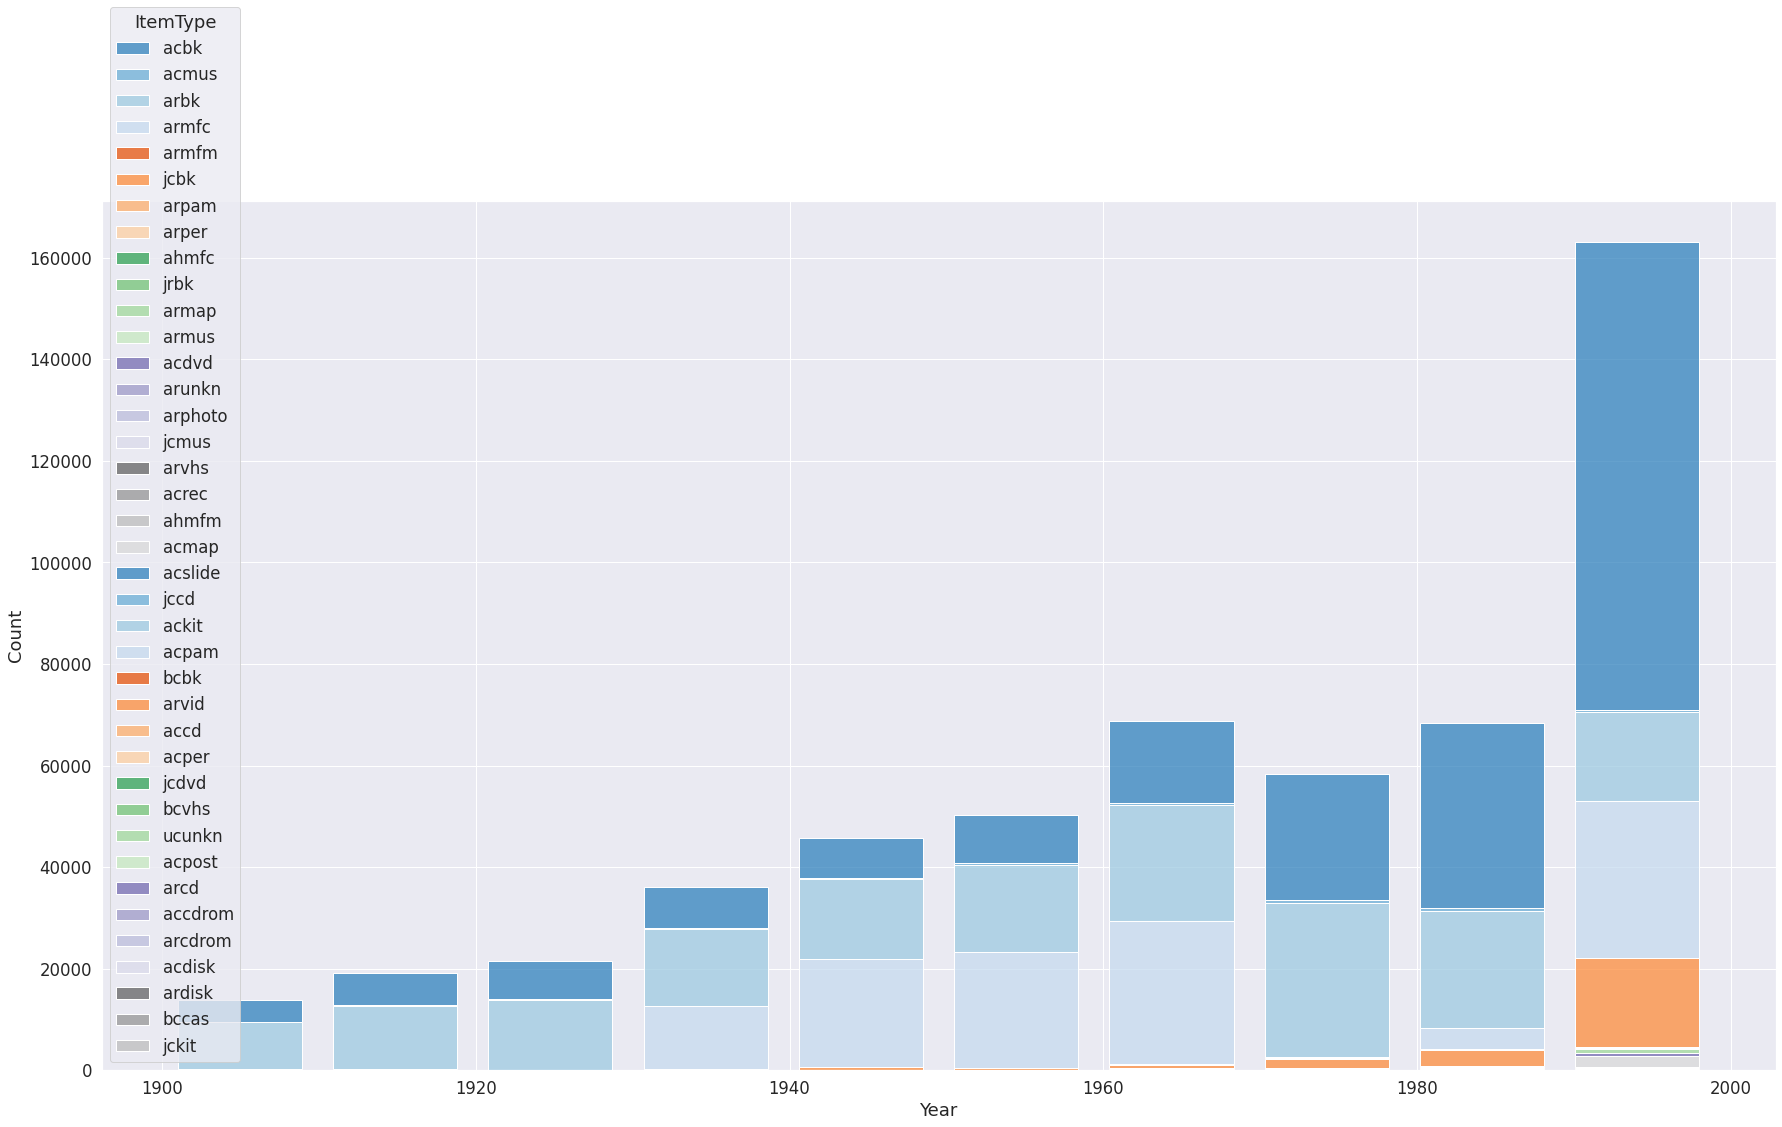

In [ ]:
ax = sns.histplot(publications_by_year, x='Year', hue='ItemType', weights='Count',
             multiple='stack', palette='tab20c', shrink=0.8)

In [ ]:
ItemCategories = data['ItemType'].value_counts(ascending=True)

In [ ]:
ItemCategories = pd.DataFrame(ItemCategories[-5:]).reset_index()
ItemCategories.columns = ["ItemType", "ItemCount"]

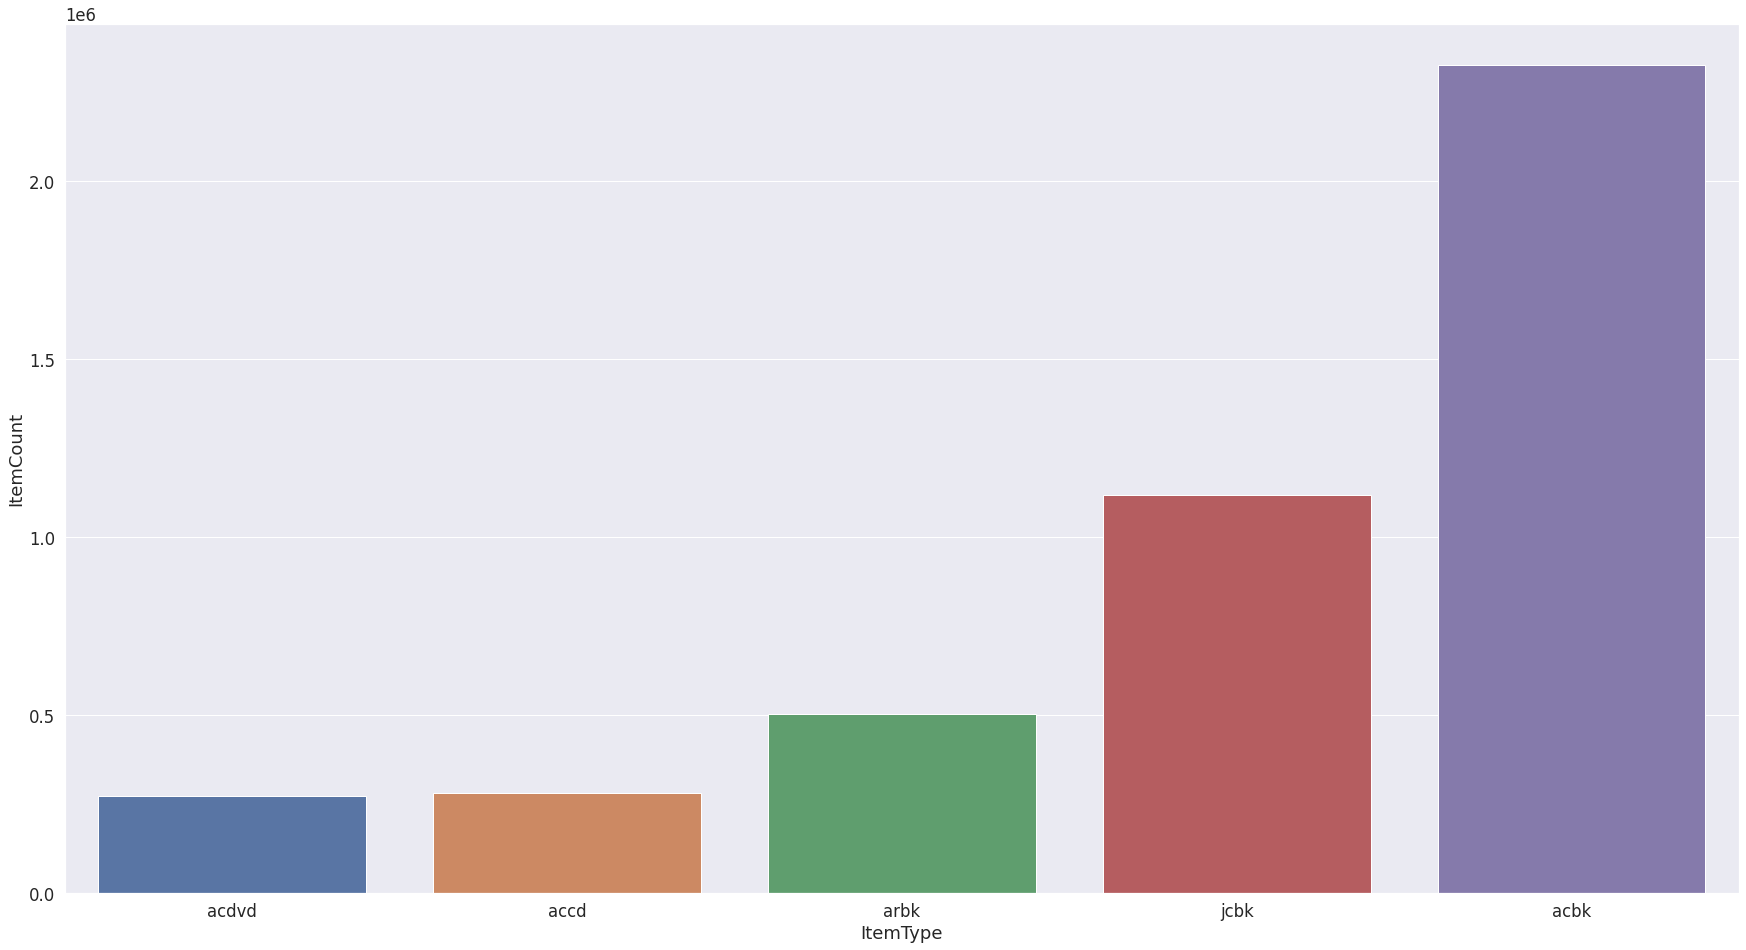

In [ ]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategories)


### Selecting Data for Training & Testing

Can we fit a linear model to predict publications in given year?

### use mean squred error to determine how far away your predicition was from the mean abs value 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


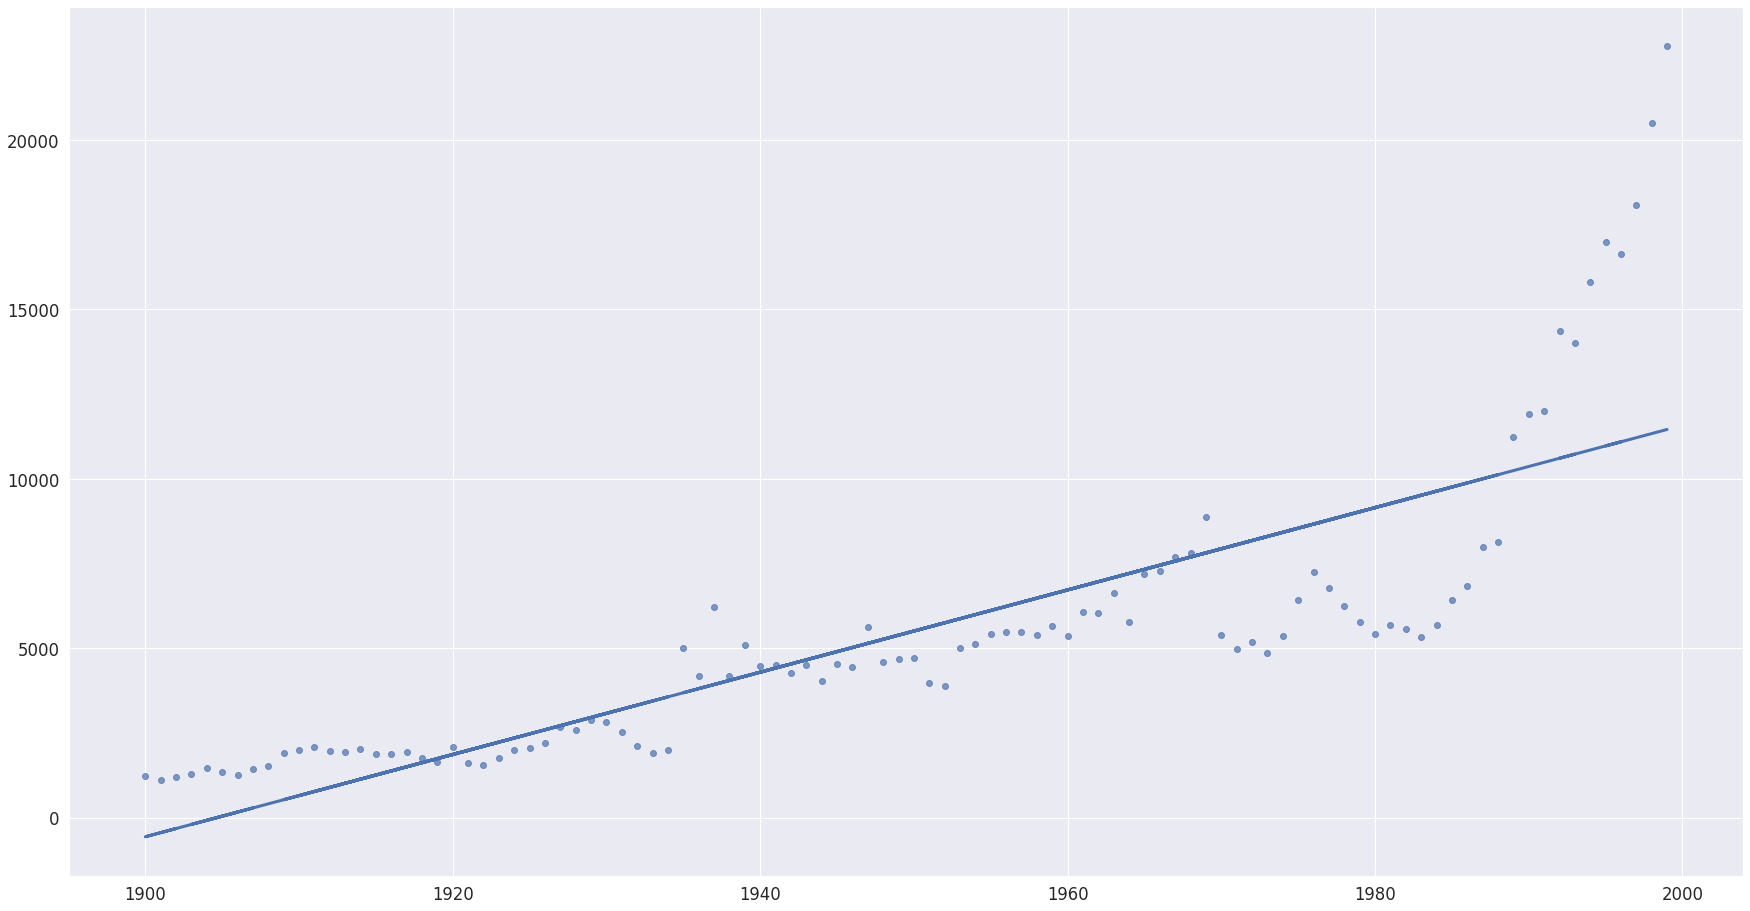

In [ ]:
import statsmodels.api as sm
test_data =publications_by_year_1900_2000
X = sm.add_constant(publications_by_year_1900_2000['Year'])
model = sm.OLS(publications_by_year_1900_2000['Publications'], X)
results = model.fit()
plt.scatter(publications_by_year_1900_2000['Year'], publications_by_year_1900_2000['Publications'], alpha=0.7)
y_predict = results.params[0] + results.params[1]*publications_by_year_1900_2000['Year']
plt.plot(publications_by_year_1900_2000['Year'], y_predict, linewidth=3)

In [ ]:
test_data.head()

,Year,Publications
20,1999.0,22768
21,1998.0,20503
22,1997.0,18080
23,1995.0,16996
24,1996.0,16647


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Publications   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           6.46e-25
Time:                        06:36:02   Log-Likelihood:                -924.09
No. Observations:                 100   AIC:                             1852.
Df Residuals:                      98   BIC:                             1857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.312e+05    1.7e+04    -13.581      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
XX = test_data[['Year']]
YY = test_data['Publications']
x_train, x_test,y_train, y_test = train_test_split(XX,YY,test_size = 0.2)
clf = LinearRegression()
clf.fit(x_train,y_train)
print("LinearRegression Score:")
print(clf.score(x_test,y_test)) #  return the coefficient of determination of the prediction
y_pred = clf.predict(x_test)
MSE = mean_squared_error(y_test, y_pred ) # all sum (pred -  true)**2 /N
print("MSE: ", MSE)
evs = explained_variance_score(y_test,y_pred, multioutput='uniform_average')
#MSE
print("EV Score: ", evs)

LinearRegression Score:
0.6942408595537364
MSE:  5269113.397606077
EV Score:  0.6943056172087831


In [ ]:
elapsed = timeit.default_timer() - start_time
elapsed

57.73953606799998

In [ ]:
#Randome forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
RFC = RandomForestClassifier(max_depth = 2, random_state = 0) # 
# max_depth: the maximum depth of tree
RFC.fit(x_train,y_train)
pred_r = RFC.predict(x_test)

MSE = mean_squared_error(y_test, pred_r ) # all sum (pred -  true)**2 /N
print("MSE: ", MSE)
Revs = explained_variance_score(y_test,pred_r, multioutput='uniform_average')
print("EV Score: ", Revs)

MSE:  706961.6
EV Score:  0.9601117618220935
